<a href="https://www.kaggle.com/code/ismaelelhussein/ecg-machine-and-deep-learning-models?scriptVersionId=175347494" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [29]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:                        
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

***Importing our main libraries***

In [30]:
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
# import keras
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
# from keras.utils import to_categorical
from sklearn.utils import class_weight

***Firstly,
MIT- Arrhythmia Dataset contains:
Number of Samples: 109446
Number of Categories: 5
Sampling Frequency: 125Hz
Data Source: Physionet's MIT-BIH Arrhythmia Dataset
Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
We read through pandas library .csv file to start processing on it,***

- ECG heartbeat classification can be used in real-time for arrhythmia detection. Arrhythmias are abnormal heart rhythms that can be dangerous. By classifying heartbeats in real-time, doctors can monitor patients for arrhythmias and intervene quickly if necessary.
- For instance, a device worn by a patient could use ECG heartbeat classification to monitor their heart rhythm for signs of arrhythmia. If an arrhythmia is detected, the device could alert the patient or their doctor, and also for driver detection of fatigue using ecg sensor or smartwatch.

In [31]:
data_path = "./Data/"
train_df = pd.read_csv(data_path + 'mitbih_train.csv',header=None)
test_df = pd.read_csv(data_path + 'mitbih_test.csv',header=None)

***let's show the training data to know what it contains how many rows & columns***

In [32]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


***let's show the test data to know what it contains how many rows & columns***

In [33]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


***We get the unique values from the last column that contains all classes and our target, and rename it to become more clear and clarifiable***

In [34]:
# Assuming the target column is the last column
target_column_index = train_df.shape[1] - 1

# Get the unique values in the target column
class_labels = train_df[target_column_index].unique()

# Assign meaningful names to the class labels based on domain knowledge
class_names = {
    0: "Normal Beats",
    1: "Supraventricular Ectopy Beats",
    2: "Ventricular Ectopy Beats",
    3: "Fusion Beats",
    4: "Unclassifiable Beats"
}

# Print class labels with their assigned names
for label in class_labels:
    print(f"Class label {label}: {class_names[label]}")

Class label 0.0: Normal Beats
Class label 1.0: Supraventricular Ectopy Beats
Class label 2.0: Ventricular Ectopy Beats
Class label 3.0: Fusion Beats
Class label 4.0: Unclassifiable Beats


***See if there's missing values in the dataset, by seeing the NaN and average mean but all of the columns have a numbers because its contains of reads in every row at the end of column numbers it captures the electrical activity of your heart over time, ECG datasets are typically large and formatted with multiple leads (channels) capturing electrical activity from different angles of the heart.***

In [35]:
# Explore dataset
print("Columns and their NaN percentages:")
null_col = train_df.isna().mean() * 100
print(null_col)

Columns and their NaN percentages:
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
183    0.0
184    0.0
185    0.0
186    0.0
187    0.0
Length: 188, dtype: float64


***Change the datatype to float and get the unique values in the last column to see how many rows in every class and store them in equilibre variable and print them***

In [36]:
train_df[187]=train_df[187].astype(float)
equilibre = train_df[187].value_counts()
print(equilibre)

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


In [37]:
test_df[187]=test_df[187].astype(float)
equilibre = test_df[187].value_counts()
print(equilibre)

187
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64


***Printing all column names, but on our case there's no column names so, it prints index of them***

In [38]:
print(train_df.columns)

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
      dtype='int64', length=188)


***Getting all info about the training dataset***

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


***Getting all info about the testing dataset***

In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


***Getting all mean on every column***

In [41]:
# Assuming you loaded the data into a DataFrame named 'data'
column_means = train_df.mean()
print(column_means)

0      0.890360
1      0.758160
2      0.423972
3      0.219104
4      0.201127
         ...   
183    0.003471
184    0.003221
185    0.002945
186    0.002807
187    0.473376
Length: 188, dtype: float64


***(describe) shows the mean and counting numbers of rows and many info that could led us to understand more about it***

In [42]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


***Get a pie chart that explain every class with its perecentages in the training dataset***

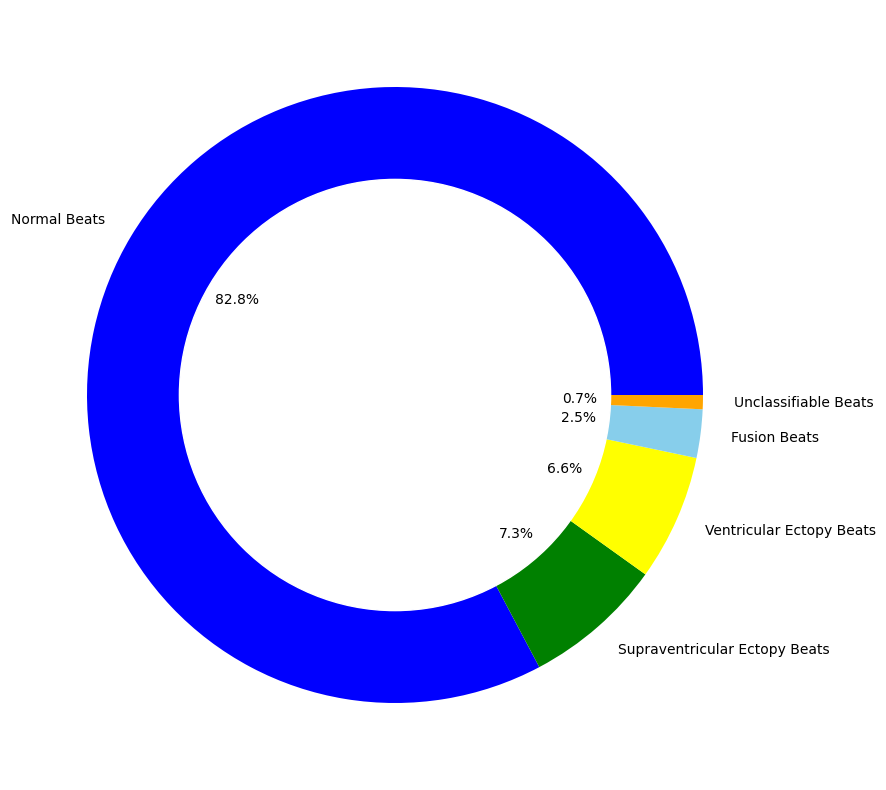

In [43]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['Normal Beats','Supraventricular Ectopy Beats','Ventricular Ectopy Beats','Fusion Beats','Unclassifiable Beats'], colors=['Blue','Green','Yellow','Skyblue','Orange'],autopct='%1.1f%%', textprops={'color': 'black'})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Resampling the data first

***Resample the training data to 20000 samples each class to make it more balance to work in it, because the normal beats class contains much more samples than the others and that could led for imbalance that in the model for an overfitting***

In [44]:
df_1 = train_df[train_df[187] == 1]
df_2 = train_df[train_df[187] == 2]
df_3 = train_df[train_df[187] == 3]
df_4 = train_df[train_df[187] == 4]

In [45]:
from sklearn.utils import resample

df_1_upsample = resample(df_1, n_samples = 20000, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 20000, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 20000, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 20000, replace = True, random_state = 123)
df_0 = train_df[train_df[187]==0].sample(n =20000, random_state=123)
train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

***Pie Chart shows the training dataset after resampling***

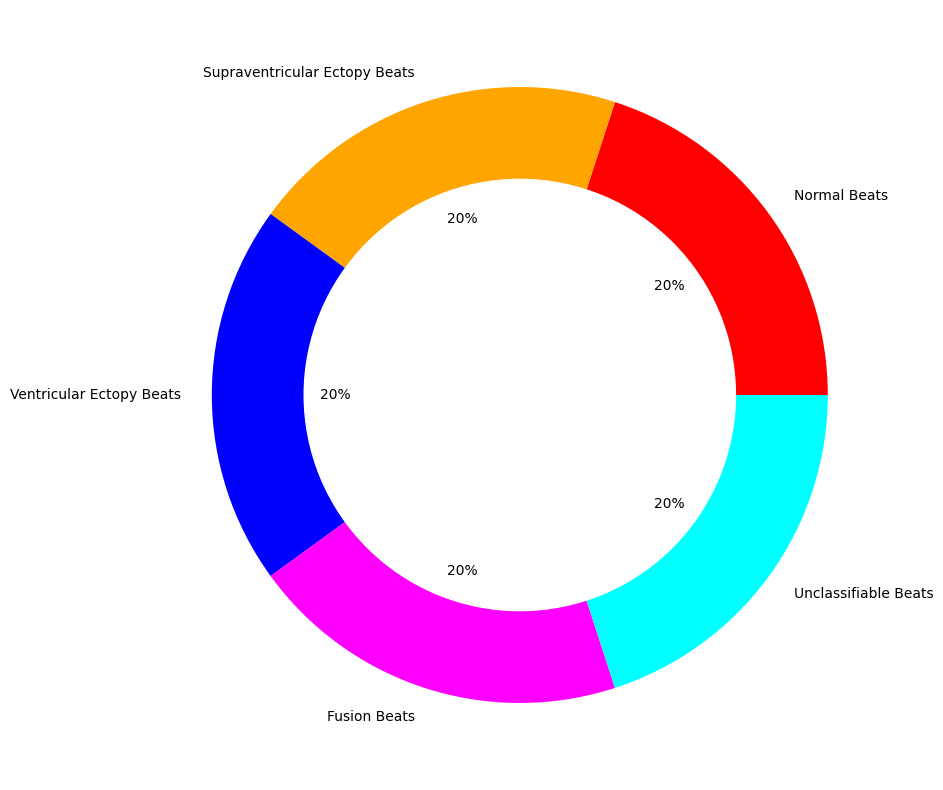

In [46]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train_df[187].value_counts(), labels=['Normal Beats','Supraventricular Ectopy Beats','Ventricular Ectopy Beats','Fusion Beats','Unclassifiable Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

***Ensure of resampling our training dataset works***

In [47]:
print(train_df[187].value_counts())
print(len(train_df[187].value_counts()))

187
0.0    20000
1.0    20000
2.0    20000
3.0    20000
4.0    20000
Name: count, dtype: int64
5


***Resample the testing data to 5000 samples each class to make it more balance to work in it, because the normal beats class contains much more samples than the others and that could led for imbalance that in the model for an overfitting***

In [48]:
df_1_t = test_df[test_df[187] == 1]
df_2_t = test_df[test_df[187] == 2]
df_3_t = test_df[test_df[187] == 3]
df_4_t = test_df[test_df[187] == 4]

In [49]:
from sklearn.utils import resample

df_1_upsample_t = resample(df_1, n_samples = 5000, replace = True, random_state = 123)
df_2_upsample_t = resample(df_2, n_samples = 5000, replace = True, random_state = 123)
df_3_upsample_t = resample(df_3, n_samples = 5000, replace = True, random_state = 123)
df_4_upsample_t = resample(df_4, n_samples = 5000, replace = True, random_state = 123)
df_0_t = test_df[test_df[187]==0].sample(n =5000, random_state=123)
test_df = pd.concat([df_0_t, df_1_upsample_t, df_2_upsample_t, df_3_upsample_t, df_4_upsample_t])



***Pie Chart shows the testing dataset after resampling***

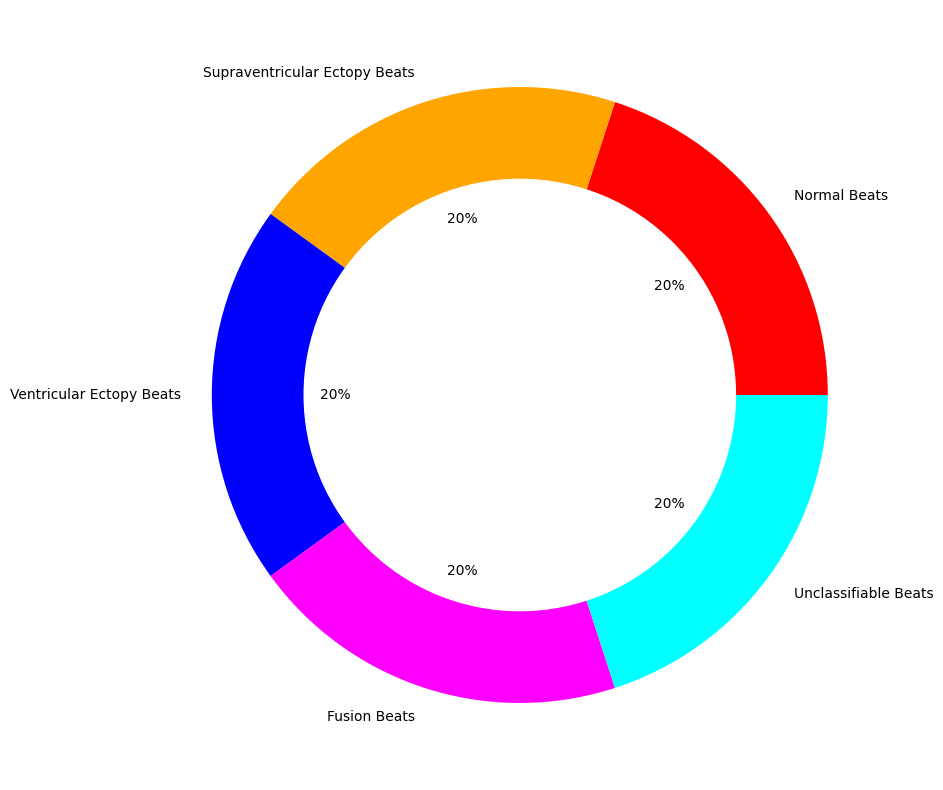

In [50]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(test_df[187].value_counts(), labels=['Normal Beats','Supraventricular Ectopy Beats','Ventricular Ectopy Beats','Fusion Beats','Unclassifiable Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# **Pre-Processing Phase**

***With Last column (188) index -1, is the features that contains all classes, we split it into features and labels on the training dataset***

In [51]:
X_train = train_df.drop(columns = [187])
y_train = train_df[187]

- Low-Pass Filter: A low-pass filter allows signals below a certain cutoff frequency to pass through unaffected while attenuating frequencies above the cutoff. In the context of ECG signals, it helps remove high-frequency noise while preserving the important low-frequency components related to heart activity.
- butter_lowpass_filter Function: This function encapsulates the process of designing and applying the Butterworth low-pass filter. It takes parameters such as the cutoff frequency, sampling rate, and filter order, and returns the filtered signal.***

In [52]:
from scipy.signal import butter, filtfilt

ecg_data = train_df
ecg_signal = X_train
class_labels = y_train
sampling_rate = 125
def butter_lowpass_filter(data, cutoff_freq, fs, order=5):
    nyquist_freq = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Example usage:
cutoff_frequency = 50  # Define the cutoff frequency in Hz
filtered_ecg_signal = butter_lowpass_filter(ecg_signal, cutoff_frequency, sampling_rate)

***Spliting the training dataset into train, valid for using them in machine and deep learning models, Using the testin dataset for separating into features and labels also, Use standard scaler function to normalize our training dataset and transform only on valid and test***

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Separate features and target variable for test dataset
X_test = test_df.drop(columns=[187])
y_test = test_df[187]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_normalized = scaler.fit_transform(X_train)
# Transform the valid data using the fitted scaler
X_valid_normalized = scaler.transform(X_valid)
# Transform the test data using the fitted scaler
X_test_normalized = scaler.transform(X_test)

print("Before Normalization:")
print(X_train.head(5))

print("After Normalization:")
print(X_train_normalized[:, 5])

Before Normalization:
            0         1         2         3         4         5         6    \
80646  1.000000  0.980880  0.600382  0.288719  0.181644  0.133843  0.114723   
76808  0.000000  0.018006  0.056787  0.135734  0.218837  0.270083  0.326870   
79759  0.000000  0.067395  0.131148  0.265938  0.404372  0.495446  0.557377   
34449  1.000000  0.940141  0.753521  0.362676  0.154930  0.102113  0.070423   
82406  0.845488  0.756490  0.653894  0.579728  0.489493  0.396786  0.307787   

            7         8         9    ...  177  178  179  180  181  182  183  \
80646  0.091778  0.082218  0.070746  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
76808  0.351801  0.405817  0.518006  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
79759  0.615665  0.677596  0.744991  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
34449  0.031690  0.007042  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
82406  0.228677  0.158220  0.122373  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       184  185  186  
80646

***Shows the first 5 rows in data***

In [54]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
14967,1.0,0.647702,0.039387,0.004376,0.102845,0.063457,0.067834,0.048140,0.045952,0.045952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71482,1.0,0.946619,0.651246,0.330961,0.000000,0.067616,0.092527,0.163701,0.192171,0.177936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23543,1.0,0.855967,0.302469,0.041152,0.185185,0.160494,0.098765,0.092593,0.109053,0.088477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9174,1.0,0.838806,0.738806,0.641791,0.604478,0.583582,0.580597,0.580597,0.591045,0.577612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42319,1.0,0.720257,0.019293,0.106109,0.073955,0.086817,0.070740,0.077170,0.070740,0.083601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***Printing the shape of the training dataset after resampling it***

In [55]:
train_df.shape

(100000, 188)

***Printing the shape of the testing dataset after resampling it***

In [56]:
test_df.shape

(25000, 188)

# **Machine Learning Classifiers**

# ***Support Vector Machine (SVM) Classifier***

***It is a supervised machine learning algorithm which can be used for both classification and regression problems. However, it is mostly used in classification applications.
• The classification is performed by finding the hyperplane that best separates the two classes.***
- Select the hyper-plane which separate the two classes better.
- Maximizing the distance between nearest data point (either class) and the hyper-plane. This distance is called Margin.
- Margin: it is the distance between the hyperplane and the observations closest to the hyperplane (support vectors).
- Support Vectors: These are the points that are closest to the hyperplane. A separating line will be defined with the help of these data points.

In [57]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create the SVM classifier
svm_classifier = svm.SVC(kernel='rbf', random_state=42)

# Train the classifier on the normalized training data
svm_classifier.fit(X_train_normalized, y_train)

# Make predictions on the normalized validation set
y_pred_valid = svm_classifier.predict(X_valid_normalized)

# Calculate accuracy on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)

# Make predictions on the normalized test set
y_pred_test = svm_classifier.predict(X_test_normalized)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.94495
Test Accuracy: 0.94568


# **Random Forest Classifier**

- Random forest classifier is a popular machine learning algorithm used for both classification and regression tasks
- It's an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=123)

# Train the classifier using extracted features and corresponding labels
rf_classifier.fit(X_train_normalized, y_train)

# Predict labels for validation data
y_pred_valid = rf_classifier.predict(X_valid_normalized)

# Calculate accuracy on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)

# Predict labels for test data
y_pred_test = rf_classifier.predict(X_test_normalized)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.99665
Test Accuracy: 0.9974


# ***Decision Tree (DT) Classifier***

- Decision trees being one of the most popular and effective techniques used to solve classification problems.
- It is important to prioritize the features when creating a tree.

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create the Decision Tree classifier
clf_dt = DecisionTreeClassifier(random_state=42)

# Train the classifier on the normalized training data
clf_dt.fit(X_train_normalized, y_train)

# Make predictions on the normalized validation set
y_pred_valid = clf_dt.predict(X_valid_normalized)

# Calculate accuracy on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)

# Make predictions on the normalized test set
y_pred_test = clf_dt.predict(X_test_normalized)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.98505
Test Accuracy: 0.98592


# ***Ensemble Learning (Voting Classifier to combine the three classifiers)***

***A voting classifier is a machine learning model that combines the predictions of several other individual models, also known as an ensemble method.  Instead of relying on a single model, it leverages the strengths of various models to arrive at a more robust prediction.***

In [60]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Create the voting ensemble
voting_clf = VotingClassifier(estimators=[('decision_tree', clf_dt), ('rf', rf_classifier), ('support_vector_machine', svm_classifier)], voting='hard')

# Train the voting ensemble on the normalized training data
voting_clf.fit(X_train_normalized, y_train)

# Make predictions on the normalized validation set
y_pred_valid = voting_clf.predict(X_valid_normalized)

# Calculate accuracy on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)

# Make predictions on the normalized test set
y_pred_test = voting_clf.predict(X_test_normalized)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.99515
Test Accuracy: 0.99588


# ***Confusion Matrix of Ensemble learning***

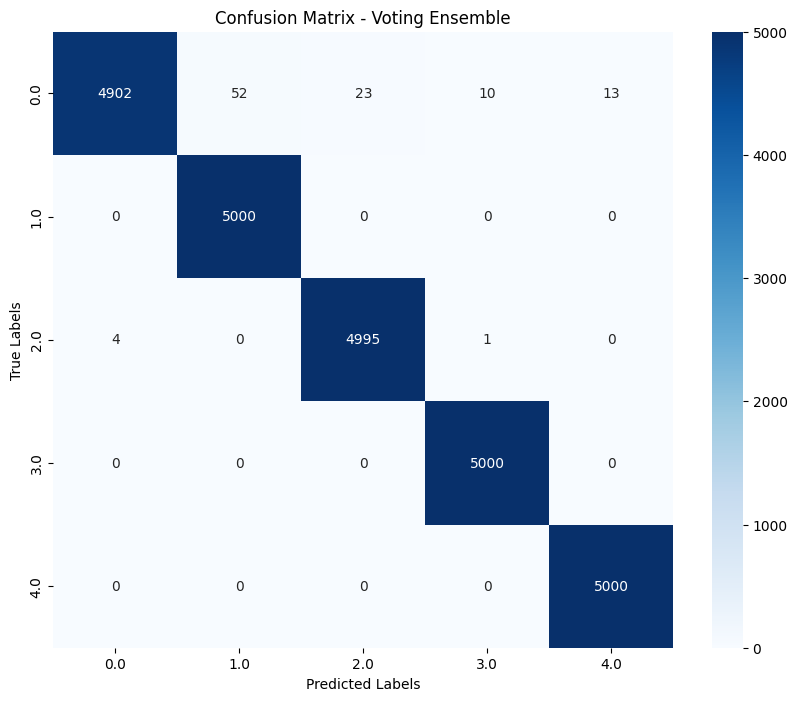

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Extract unique labels from the target variable
labels = np.unique(y_test)
# Calculate confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Voting Ensemble')
plt.show()

# **Evaluation of Machine Learning Classifiers**

Validation Accuracy for Decision Tree: 0.98505
Test Accuracy for Decision Tree: 0.98592
Confusion Matrix for Decision Tree:
[[4658  140  113   38   51]
 [   0 5000    0    0    0]
 [   7    0 4991    2    0]
 [   0    0    0 5000    0]
 [   1    0    0    0 4999]]


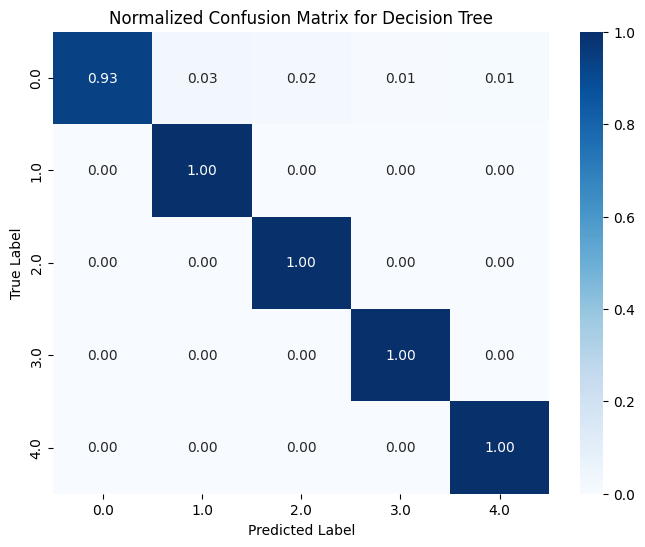

Validation Accuracy for Random Forest: 0.99665
Test Accuracy for Random Forest: 0.9974
Confusion Matrix for Random Forest:
[[4943   19   22    4   12]
 [   0 5000    0    0    0]
 [   5    0 4995    0    0]
 [   0    0    0 5000    0]
 [   3    0    0    0 4997]]


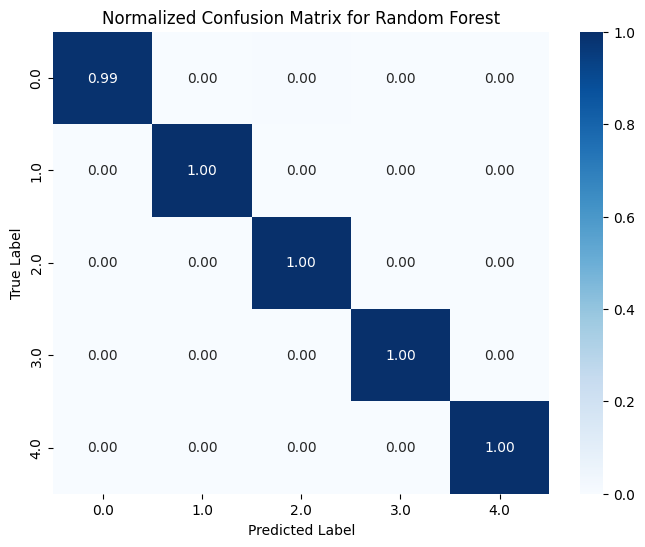

Validation Accuracy for Support Vector Machine: 0.94495
Test Accuracy for Support Vector Machine: 0.94568
Confusion Matrix for Support Vector Machine:
[[4506  239   57  174   24]
 [ 400 4556   18   20    6]
 [  94   25 4705  155   21]
 [  26    5   12 4952    5]
 [  52    2   19    4 4923]]


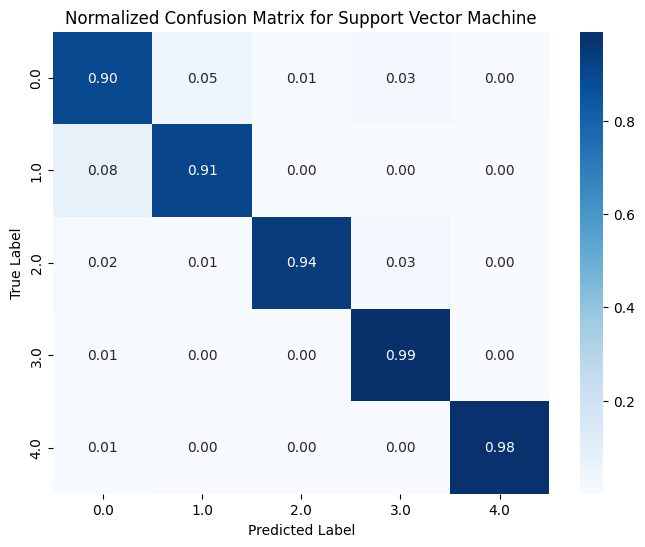

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract unique labels from the target variable
labels = np.unique(y_test)

# List to store accuracy scores for each classifier
accuracy_scores = []

# List to store confusion matrices for each classifier
confusion_matrices = []

classifiers = [('Decision Tree', clf_dt), ('Random Forest', rf_classifier), ('Support Vector Machine', svm_classifier)]

# Loop through each classifier
for name, clf in classifiers:
    # Train the classifier on the normalized training data
    clf.fit(X_train_normalized, y_train)
    
    # Make predictions on the normalized validation set
    y_pred_valid = clf.predict(X_valid_normalized)
    
    # Calculate accuracy on the validation set
    accuracy_valid = accuracy_score(y_valid, y_pred_valid)
    print(f"Validation Accuracy for {name}: {accuracy_valid}")
    
    # Make predictions on the normalized test set
    y_pred_test = clf.predict(X_test_normalized)
    
    # Calculate accuracy on the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f"Test Accuracy for {name}: {accuracy_test}")
    
    # Compute confusion matrix for the classifier on the test set
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    print(f"Confusion Matrix for {name}:")
    print(conf_matrix)
    
    # Normalize confusion matrix to percentages
    conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    
    accuracy_scores.append((name, accuracy_test))
    confusion_matrices.append((name, conf_matrix_percentage))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f'Normalized Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# **Deep Learning Models**

# ***Building Feedforward Neural Network (FNN) Model***

***Feedforward Neural Network, is a fundamental type of artificial neural network architecture characterized by the unidirectional flow of information, which is a basic model that contains an input, optional hidden, and output layers.***

***We build the model and see its Architicture with an input and only one hidden layer and finally the output layer***

In [101]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

# Create the FNN model
FNN_model = Sequential()

# Add the first hidden layer with input shape 187
FNN_model.add(Dense(512, activation='relu', input_shape=(187,)))
#FNN_model.add(Dropout(0.3)) # Add dropout layer with dropout rate 0.5

# Add the second hidden layer
FNN_model.add(Dense(512, activation='relu'))
FNN_model.add(Dropout(0.1)) # Add dropout layer with dropout rate 0.1


# Add the output layer
FNN_model.add(Dense(5, activation='softmax'))

# Compile the model
FNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Print the model summary
FNN_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 512)               96256     
                                                                 
 dense_46 (Dense)            (None, 512)               262656    
                                                                 
 dropout_20 (Dropout)        (None, 512)               0         
                                                                 
 dense_47 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 361477 (1.38 MB)
Trainable params: 361477 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
from keras.utils import plot_model

# Plot model with colored border
plot_model(FNN_model, to_file='FNN_model_plot.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


***By parameterizing and reach the best possible layers in the model we run the epochs which the number of iterations on our data to see its accuracy, loss.***

In [103]:
# Fit the model
history_FNN = FNN_model.fit(X_train_normalized, y_train,
                    epochs=150,  # number of epochs
                    batch_size=128,  # batch size
                    validation_data=(X_valid_normalized, y_valid),
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model
loss, accuracy = FNN_model.evaluate(X_valid_normalized, y_valid)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

Epoch 1/150
625/625 [==============================] - 4s 5ms/step - loss: 0.3150 - accuracy: 0.8858 - val_loss: 0.2100 - val_accuracy: 0.9262
Epoch 2/150
625/625 [==============================] - 3s 5ms/step - loss: 0.1597 - accuracy: 0.9447 - val_loss: 0.1297 - val_accuracy: 0.9528
Epoch 3/150
625/625 [==============================] - 3s 5ms/step - loss: 0.1115 - accuracy: 0.9621 - val_loss: 0.1127 - val_accuracy: 0.9594
Epoch 4/150
625/625 [==============================] - 3s 5ms/step - loss: 0.0898 - accuracy: 0.9699 - val_loss: 0.0869 - val_accuracy: 0.9707
Epoch 5/150
625/625 [==============================] - 3s 5ms/step - loss: 0.0705 - accuracy: 0.9769 - val_loss: 0.0747 - val_accuracy: 0.9746
Epoch 6/150
625/625 [==============================] - 3s 5ms/step - loss: 0.0670 - accuracy: 0.9777 - val_loss: 0.0675 - val_accuracy: 0.9785
Epoch 7/150
207/625 [========>.....................] - ETA: 1s - loss: 0.0604 - accuracy: 0.9808

KeyboardInterrupt: 

***Visualize our Training, Valid accuracies and loss***

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_FNN.history['accuracy'], label='Training Accuracy')
plt.plot(history_FNN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_FNN.history['loss'], label='Training Loss')
plt.plot(history_FNN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

***Reshapes the true labels (y_test) into a 2D array suitable for the OneHotEncoder, converts the encoded labels back to single integer labels by taking the index of the maximum value along axis 1, and evaluating model's performance by visualizing how well it classified the test data using a confusion matrix. The heatmap with annotations allows you to see how many data points from each true class were correctly predicted as each class by the model.***

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Make predictions on the test data
y_pred_test_prob = FNN_model.predict(X_test_normalized)
y_pred_test_classes = np.argmax(y_pred_test_prob, axis=1)  # Convert probabilities to class labels

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Reshape y_test to a 2D array (required by OneHotEncoder)
y_test_reshaped = y_test.to_numpy().reshape(-1, 1)

# Fit and transform y_test to one-hot encoded format
y_test_onehot = encoder.fit_transform(y_test_reshaped)

# Convert one-hot encoded labels to single integer labels for y_test
y_test_classes = np.argmax(y_test_onehot, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_test_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


***Visualizing it but with perecentages***

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix as before
conf_matrix = confusion_matrix(y_test_classes, y_pred_test_classes)

# Compute percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_test_classes)

# Print confusion matrix
print("Confusion Matrix for Test Data:")
print(conf_matrix)


***Getting the test accuracy with higher test accuracy because of the normal beats class that has the most more samples than the others***

In [ ]:
from sklearn.metrics import accuracy_score

# Compute accuracy
test_accuracy = accuracy_score(y_test_classes, y_pred_test_classes)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")


***Getting the precision, accuracy, recall, f1-score***

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test_classes, y_pred_test_classes):
    accuracy = accuracy_score(y_test_classes, y_pred_test_classes)
    precision = precision_score(y_test_classes, y_pred_test_classes, average='micro')
    recall = recall_score(y_test_classes, y_pred_test_classes, average='micro')
    f1 = f1_score(y_test_classes, y_pred_test_classes, average='micro')
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

# Example usage:
evaluate_model(y_test_classes, y_pred_test_classes)


# ***Building Convolutional Neural Network (CNN) Model with the best acuuracy & confusion matrix***

***The architecture of CNN for image recognition typically consists of several layers, including convolutional layers, pooling layers, and fully connected layers.***

In [108]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [105]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from keras.callbacks import EarlyStopping

# Create the CNN model
CNN_model = Sequential()

# Add the first convolutional layer
CNN_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(187,1)))
CNN_model.add(Dense(256, activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Dropout(0.5)) # Add dropout

# Add the second convolutional layer
CNN_model.add(Conv1D(64, kernel_size=3, activation='relu'))
CNN_model.add(Dense(256, activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Dropout(0.1)) # Add dropout

# Add the Flatten layer
CNN_model.add(Flatten())

# Add the output layer
CNN_model.add(Dense(5, activation='softmax'))

# Compile the model
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Print the model summary
CNN_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 185, 32)           128       
                                                                 
 dense_48 (Dense)            (None, 185, 256)          8448      
                                                                 
 batch_normalization_10 (Ba  (None, 185, 256)          1024      
 tchNormalization)                                               
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 92, 256)           0         
 ng1D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 92, 256)           0         
                                                                 
 conv1d_11 (Conv1D)          (None, 90, 64)          

In [106]:
from tensorflow.keras.utils import plot_model

# Plot model with colored border
plot_model(CNN_model, to_file='CNN_model_plot.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


***Same as FNN shows the accuracies per epoch but with CNN model***

In [107]:
# Fit the CNN model
# history_CNN = CNN_model.fit(X_train_normalized.reshape(-1, 187, 1), y_train,
#                     epochs=150,  # number of epochs
#                     batch_size=64,  # batch size
#                     validation_data=(X_valid_normalized, y_valid),
#                     callbacks=[early_stopping],
#                     verbose=1)

X_train2 = np.array(X_train)
X_valid = np.array(X_valid)
history_CNN = CNN_model.fit(X_train2.reshape(-1, 187, 1), y_train,
                    epochs=150,  # number of epochs
                    batch_size=64,  # batch size
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model
loss, accuracy = CNN_model.evaluate(X_valid, y_valid)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

Epoch 1/150
  29/1250 [..............................] - ETA: 2:01 - loss: 1.3718 - accuracy: 0.6272

KeyboardInterrupt: 

NameError: name 'history_CNN' is not defined

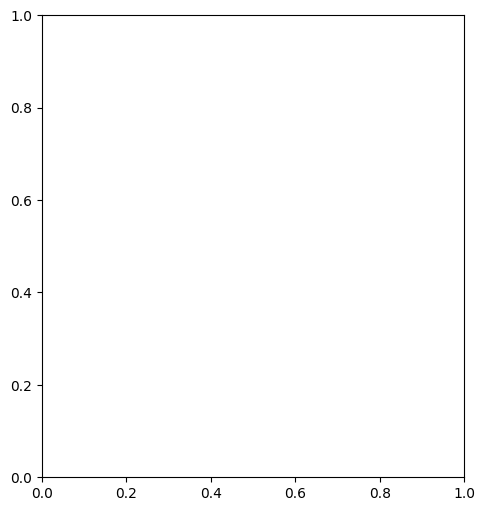

In [70]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_CNN.history['accuracy'], label='Training Accuracy')
plt.plot(history_CNN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_CNN.history['loss'], label='Training Loss')
plt.plot(history_CNN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Make predictions on the test data
y_pred_test_prob_CNN = CNN_model.predict(X_test_normalized)
y_pred_test_classes_CNN = np.argmax(y_pred_test_prob_CNN, axis=1)  # Convert probabilities to class labels

# Initialize OneHotEncoder
encoder_CNN = OneHotEncoder(sparse=False)

# Reshape y_test to a 2D array (required by OneHotEncoder)
y_test_reshaped_CNN = y_test.to_numpy().reshape(-1, 1)

# Fit and transform y_test to one-hot encoded format
y_test_onehot_CNN = encoder_CNN.fit_transform(y_test_reshaped_CNN)

# Convert one-hot encoded labels to single integer labels for y_test
y_test_classes_CNN = np.argmax(y_test_onehot_CNN, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes_CNN, y_pred_test_classes_CNN)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix as before
conf_matrix = confusion_matrix(y_test_classes_CNN, y_pred_test_classes_CNN)

# Compute percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Compute accuracy
test_accuracy = accuracy_score(y_test_classes_CNN, y_pred_test_classes_CNN)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test_classes_CNN, y_pred_test_classes_CNN):
    accuracy = accuracy_score(y_test_classes_CNN, y_pred_test_classes_CNN)
    precision = precision_score(y_test_classes_CNN, y_pred_test_classes_CNN, average='micro')
    recall = recall_score(y_test_classes_CNN, y_pred_test_classes_CNN, average='micro')
    f1 = f1_score(y_test_classes_CNN, y_pred_test_classes_CNN, average='micro')
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

# Example usage:
evaluate_model(y_test_classes_CNN, y_pred_test_classes_CNN)


# ***Building a Recurrent Neural Network (LSTM) Model***

***An RNN can handle sequential data, accepting the current input data, and previously received inputs. RNNs can memorize previous inputs due to their internal memory. RNN works on the principle of saving the output of a particular layer and feeding this back to the input in order to predict the output of the layer.***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

def create_RNN_model():
    RNN_model = Sequential([
        LSTM(64, input_shape=(187,1), return_sequences=True),
        Dropout(0.3),
        LSTM(64),
        Dense(128, activation='relu'),
        Dropout(0.1),  # Adding dropout for regularization
        Dense(5, activation='softmax')
    ])
    # Compile the model
    RNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return RNN_model


# Create the RNN model
RNN_model = create_RNN_model()


# Print the model summary
RNN_model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot model with colored border
plot_model(RNN_model, to_file='RNN_model_plot.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
# Train the model
history_RNN = RNN_model.fit(X_train_normalized.reshape(-1, 187, 1), y_train, epochs=150, batch_size=128, validation_data=(X_valid_normalized, y_valid), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = RNN_model.evaluate(X_valid_normalized, y_valid)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)


In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_RNN.history['accuracy'], label='Training Accuracy')
plt.plot(history_RNN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_RNN.history['loss'], label='Training Loss')
plt.plot(history_RNN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Make predictions on the test data
y_pred_test_prob_RNN = RNN_model.predict(X_test_normalized)
y_pred_test_classes_RNN = np.argmax(y_pred_test_prob_RNN, axis=1)  # Convert probabilities to class labels

# Initialize OneHotEncoder
encoder_rnn = OneHotEncoder(sparse=False)

# Reshape y_test to a 2D array (required by OneHotEncoder)
y_test_reshaped_RNN = y_test.to_numpy().reshape(-1, 1)

# Fit and transform y_test to one-hot encoded format
y_test_onehot_RNN = encoder_rnn.fit_transform(y_test_reshaped_RNN)

# Convert one-hot encoded labels to single integer labels for y_test
y_test_classes_RNN = np.argmax(y_test_onehot_RNN, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes_RNN, y_pred_test_classes_RNN)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix as before
conf_matrix = confusion_matrix(y_test_classes_RNN, y_pred_test_classes_RNN)

# Compute percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Compute accuracy
test_accuracy = accuracy_score(y_test_classes_RNN, y_pred_test_classes_RNN)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test_classes_RNN, y_pred_test_classes_RNN):
    accuracy = accuracy_score(y_test_classes_RNN, y_pred_test_classes_RNN)
    precision = precision_score(y_test_classes_RNN, y_pred_test_classes_RNN, average='micro')
    recall = recall_score(y_test_classes_RNN, y_pred_test_classes_RNN, average='micro')
    f1 = f1_score(y_test_classes_RNN, y_pred_test_classes_RNN, average='micro')
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

# Example usage:
evaluate_model(y_test_classes_RNN, y_pred_test_classes_RNN)

# **Ensemble Learning (Model Averaging)**

***Model averaging: This involves training multiple deep learning models with different architectures or initializations and averaging their predictions. This can help reduce overfitting and improve generalization.***

In [ ]:
# Predict probabilities for each model
fnn_probs = FNN_model.predict(X_test_normalized)
cnn_probs = CNN_model.predict(X_test_normalized.reshape(-1, 187, 1))

# # Print shapes for debugging
# print("Shapes before reshaping for RNN:")
# print("X_test_normalized:", X_test_normalized.shape)

# Reshape input data for the RNN model
X_test_rnn = X_test_normalized.reshape(-1, 187)

# # Print the reshaped shape for debugging
# print("Shape after reshaping for RNN:", X_test_rnn.shape)

# Predict using RNN model
rnn_probs = RNN_model.predict(X_test_rnn)

# Average predictions
ensemble_probs = (fnn_probs + cnn_probs + rnn_probs) / 3

# Convert probabilities to class labels
ensemble_preds = np.argmax(ensemble_probs, axis=1)

# Evaluate ensemble performance
ensemble_accuracy = np.mean(ensemble_preds == y_test)
print("Ensemble Accuracy:", ensemble_accuracy)


# **Ensemble Learning (Voting)**

***Voting: In this approach, each base model gets a single vote, and the final prediction is made based on a majority vote (for classification tasks) or averaging (for regression tasks) of the individual predictions***

In [ ]:
import numpy as np

# Predict probabilities for each model
fnn_probs_v = FNN_model.predict(X_test_normalized)
cnn_probs_v = CNN_model.predict(X_test_normalized.reshape(-1, 187, 1))
rnn_probs_v = RNN_model.predict(X_test_normalized.reshape(-1, 187))

# Convert probabilities to class labels
fnn_preds = np.argmax(fnn_probs_v, axis=1)
cnn_preds = np.argmax(cnn_probs_v, axis=1)
rnn_preds = np.argmax(rnn_probs_v, axis=1)

# Initialize ensemble predictions
ensemble_preds = []

# Perform voting
for i in range(len(X_test_normalized)):
    # Create a list to hold votes from each model
    votes = [fnn_preds[i], cnn_preds[i], rnn_preds[i]]
    
    # Perform majority voting
    # Choose the class with the highest number of votes
    ensemble_pred = max(set(votes), key=votes.count)
    
    # Add the ensemble prediction to the list
    ensemble_preds.append(ensemble_pred)

# Convert ensemble predictions to numpy array
ensemble_preds = np.array(ensemble_preds)

# Evaluate ensemble performance
ensemble_accuracy = np.mean(ensemble_preds == y_test)
print("Ensemble Accuracy:", ensemble_accuracy)


# Confusion Matrix on Ensemble Learning (Voting)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtain ensemble predictions
ensemble_preds = []

# Perform voting
for i in range(len(X_test_normalized)):
    votes = [fnn_preds[i], cnn_preds[i], rnn_preds[i]]
    ensemble_pred = max(set(votes), key=votes.count)
    ensemble_preds.append(ensemble_pred)

# Convert ensemble predictions to numpy array
ensemble_preds = np.array(ensemble_preds)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, ensemble_preds)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Saving all models

In [ ]:
# from keras.models import load_model

# # Assuming 'model' is your trained Keras model

FNN_model.save("FNN_model.h5")
CNN_model.save("CNN_model.h5")
RNN_model.save("RNN_model.h5")

# # Load the saved model
# #loaded_model = load_model("your_model.h5")

